<font size="5">
Projeto 3 - Modelagem e Simulação do Mundo Fisico
    
<font size="3">   
**Sistema Mecânico**

**Grupo:** Adney Costa, Lister Ogusuku, Ricardo Mourão, Sarah Pimenta e João Paiano

<font size="5">
Gol Roberto Carlos -1977

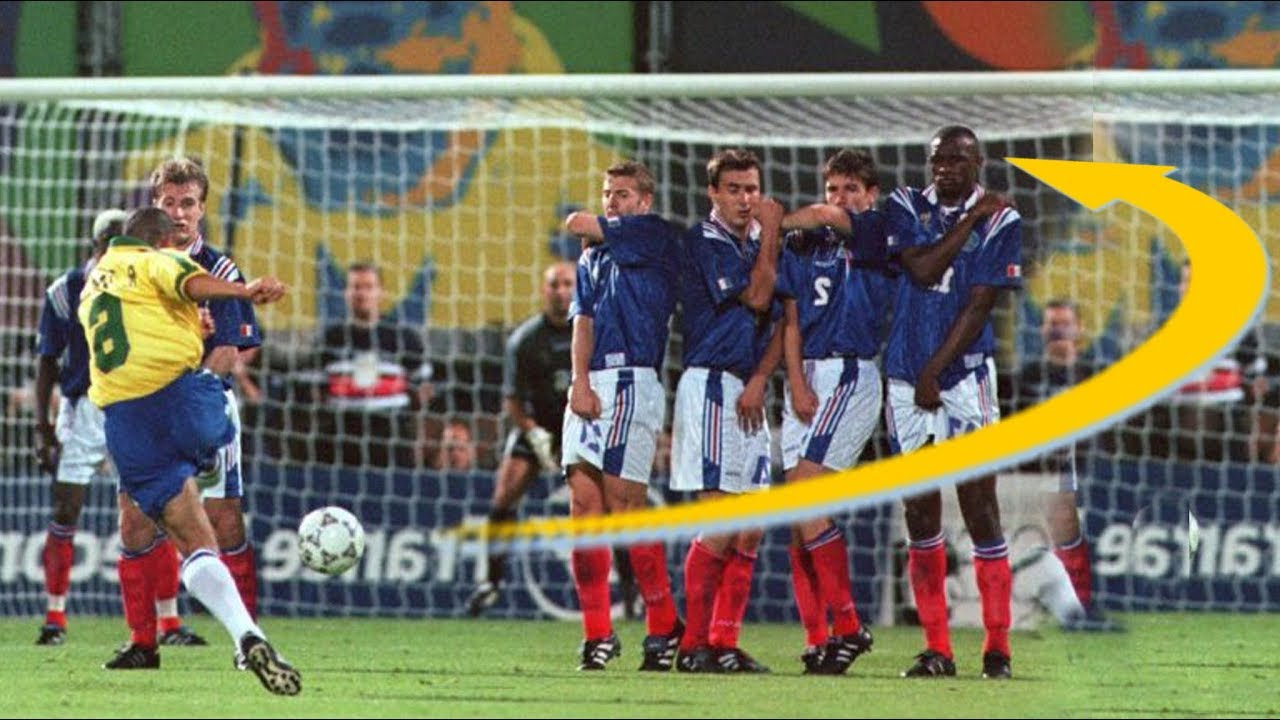

**BIBLIOTECA NECESSÁRIA**

In [9]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

**PARAMETROS**

In [10]:
#Dimenssões da bola

m = 450*(10**-3)            # Massa da bola [Kg] 
r = 0.11                    # Raio da bola [m] 
A = pi * r**2               # Área da esfera [m]

#Parametros 
g = 9.8                     # Gravidade[m/s2]
Cd = 0.45                   # Coeficiente de arrasto da esfera [adimensional]
p = 1.2754                  # Densidade do ar[Kg/m3]
Cm = 3.2                    # Coeficiente de Magnus [adimensional]


**CONDIÇÕES INICIAIS**

In [11]:
# Condições iniciais
x0 = 0                              # Posição em x inicial [m]
y0 = 0                              # Posição em y inicial, distancia do gol[m]
z0 = 0                              # Posição em z inicial [m]
V = 37                              # Velocidade do chute [m/s]
alfa = 60*pi/180                    # Ângulo inicial no plano do chão (no eixo X e eixo Y)
beta = 30*pi/180                    # Ângulo inicial de lançamento (no eixo Z)
vx0 = V*cos(beta)*cos(alfa)         # Velocidade em x inicial [m/s]
vy0 = V*cos(beta)*sin(alfa)         # Velocidade em y inicial [m/s]
vz0 = V*sin(beta)                   # Velocidade em z inicial [m/s]
w0 = 800*2*pi/60                    # Velocidade angular da bola 
X0 = [x0,y0,z0,vx0,vy0,vz0, w0]     # Lista condições iniciais 


# Lista de tempo
dt = 1e-3
t_lista = np.arange(0,2,dt)

**DECOMPOSIÇÃO DAS FORÇAS NOS TRÊS EIXOS (X,Y,Z)**

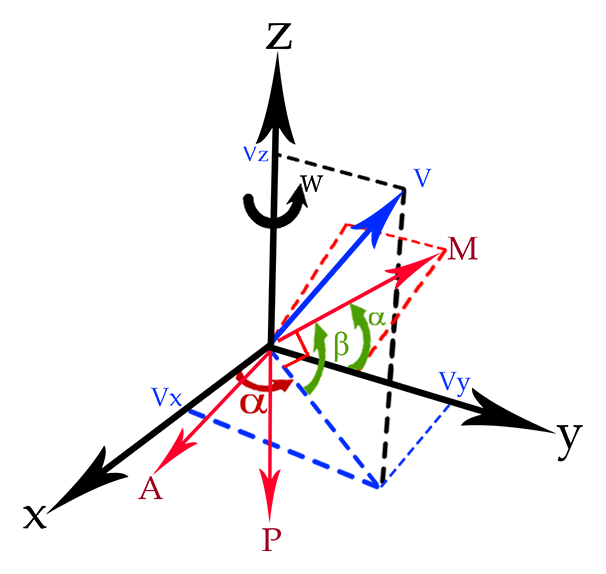

**FUNÇÃO QUE SERÁ UTILIZADA NO ODEINT**

In [12]:
def funcao(X,t):
    # Desagrupa lista
    x= X[0]
    y= X[1]
    z= X[2]
    Vx= X[3]
    Vy= X[4]
    Vz= X[5]
    w = X[6]
    
    #Velocidae
    V = sqrt(Vx**2+Vy**2+Vx**2)
    Vxy = sqrt(Vx**2+Vy**2)
    
    # Seno e Cosseno  alfa
    sen_alfa = Vy/Vxy
    cos_alfa = Vx/Vxy
    
    # Seno e Cosseno  beta
    sen_beta = Vz/V
    cos_beta = Vxy/V
    
    #Calculando Forças Peso, Força de Arasto e Força Magnus
    P = m * g
    Fa = (1/2)*p*Cd*A*(V**2)
    Fm = (1/2)*p*A*Cm*r*w*V
    
    # Calcula as taxas de variação
    dxdt= Vx
    dydt= Vy
    dzdt= Vz
    dVxdt= (1/m)*(-Fm*sen_alfa - Fa*cos_alfa*cos_beta)
    dVydt= (1/m)*(Fm*cos_alfa - Fa*sen_alfa*cos_beta)
    dVzdt= (1/m)*(-P - Fa*sen_beta)
    
    if z <= 0 and Vz < 0:
        dxdt = 0
        dydt = 0
        dzdt = 0
        dVxdt = 0
        dVydt = 0
        dVzdt = 0
        dwdt = 0
    else:
        dxdt= Vx
        dydt= Vy
        dzdt= Vz
        dVxdt= (1/m)*(-Fm*sen_alfa - Fa*cos_alfa*cos_beta)
        dVydt= (1/m)*(Fm*cos_alfa - Fa*sen_alfa*cos_beta)
        dVzdt= (1/m)*(-P - Fa*sen_beta)
        dwdt = -2*w  
        
    dXdt= [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt, dwdt]
    return dXdt

**GRÁFICO DA TRAJETÓRIA**

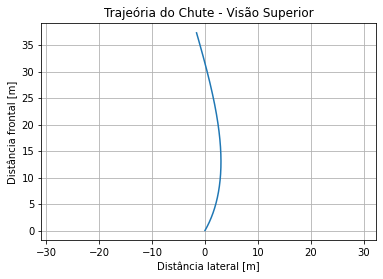

In [13]:
# Utiliza a função odeint
x= odeint(funcao,X0,t_lista)

posicao_x= x[:,0]
posicao_y= x[:,1]
posicao_z= x[:,2]

#Gráfico Visão Superior da Trajetória
plt.plot(posicao_x,posicao_y)
plt.grid(True)
plt.title("Trajeória do Chute - Visão Superior")
plt.xlabel("Distância lateral [m]")
plt.ylabel("Distância frontal [m]")
plt.axis('equal')
plt.show()


**VALIDAÇÃO DO MODELO - CHUTE DO PELÉ**

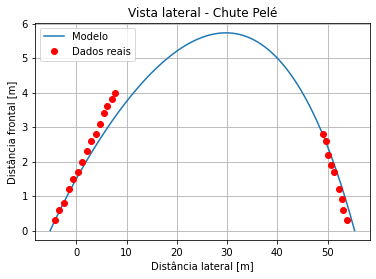

In [14]:
# Condições iniciais chute do Pelé
#Dimenssões da bola
m1 = 485*(10**-3)   # Massa da bola [Kg] 
r1 = 0.11           # Raio da bola [m]
A1 = pi * r**2      # Área da esfera [m]

#Parametros 
g1 = 9.8            # Gravidade[m/s2]
Cd1 = 0.5           # Coeficiente de arrasto da esfera [adimensional]
p1 = 1.05           # Densidade do ar[kg/m3]
Cm1 = 12            # Coeficiente de Magnus [adimensional]

# Condições iniciais
x0 = 2.9                         # Posição em x inicial [m]
y0 = -5.2                        # Posição em y inicial, distancia do gol(Pelé está atras da origem) [m]
z0 = 0                           # Posição em z inicial [m]
vx0 = 0.4                        # Velocidade em x inicial [m/s]
vy0 = 27.8                       # Velocidade em y inicial [m/s]
vz0 = 8.8                        # Velocidade em z inicial [m/s]
w0 = 42.9552                     # Velocidade angular da bola [rad/s]
X0 = [x0,y0,z0,vx0,vy0,vz0,w0]


t_lista_1= np.arange(0,3.2,0.001)

#Função patra validação
def funcao_validação(X,t):
    # Desagrupa lista
    x= X[0]
    y= X[1]
    z= X[2]
    Vx= X[3]
    Vy= X[4]
    Vz= X[5]
    w = X[6]
    V= sqrt(Vx**2 + Vy**2 + Vz**2)
    
    #Velocidade decomposta no plano X e Y
    K = sqrt(V**2-Vz**2)
    
    # Seno e Cosseno  beta
    sen_beta = Vz/V
    cos_beta = K/V
    
    # Seno e Cosseno  alfa
    sen_alfa = Vy/K
    cos_alfa = Vx/K
    
    # Forças atuantes no sistema
    P = m1 * g1
    Fa = (1/2)*p1*Cd1*A1*(V**2)
    Fm = (1/2)*p1*A1*Cm1*r1*w*V
    
    # Calcula as taxas de variação
    dxdt= Vx
    dydt= Vy
    dzdt= Vz
    dVxdt = (1/m1)*(Fa*cos_alfa*cos_beta)
    dVydt = (1/m1)*(-Fm*sen_beta*sen_alfa - Fa*cos_beta*sen_alfa)
    dVzdt = (1/m1)*(Fm*cos_beta - Fa*sen_beta - P)
    
    if z <= 0 and Vz < 0:
        dxdt = 0
        dydt = 0
        dzdt = 0
        dVxdt = 0
        dVydt = 0
        dVzdt = 0
        dwdt = 0
    else:
        dxdt = Vx
        dydt = Vy
        dzdt = Vz
        dVxdt = (1/m1)*(Fa*cos_alfa*cos_beta)
        dVydt = (1/m1)*(Fm*cos_beta - Fa*sen_alfa*cos_beta)
        dVzdt = (1/m1)*(Fm*sen_beta - P - Fa*sen_beta)
        dwdt = -3*w
 
        
    dXdt= [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt,dwdt]
    return dXdt

# Dados Experimentais
lista_x = []
lista_y = [-4.3,-3.4,-2.4,-1.5,-0.6,0.4,1.2,2.1,2.9,3.9,4.7,5.5,6.2,7.1,7.7,49.0,49.6,50.1,50.6,51.2,52.2,52.8,53.1,53.8]
lista_z = [0.3,0.6,0.8,1.2,1.5,1.7,2.0,2.3,2.6,2.8,3.1,3.4,3.6,3.8,4.0,2.8,2.6,2.2,1.9,1.7,1.2,0.9,0.6,0.3]


x_1= odeint(funcao_validação,X0,t_lista_1)

posicao_x_1= x_1[:,0]
posicao_y_1= x_1[:,1]
posicao_z_1= x_1[:,2]


plt.plot(posicao_y_1,posicao_z_1, label = 'Modelo')
plt.plot(lista_y,lista_z,"ro", label = 'Dados reais')
plt.grid(True)
plt.title("Vista lateral - Chute Pelé")
plt.xlabel("Distância lateral [m]")
plt.ylabel("Distância frontal [m]")
plt.legend()
plt.show()


**GRAFICO DA TRAJETÓRIA E GRÁFICO CONCLUSIVO DA VARIAÇÃO DA VELOCIDAE ANGULAR**

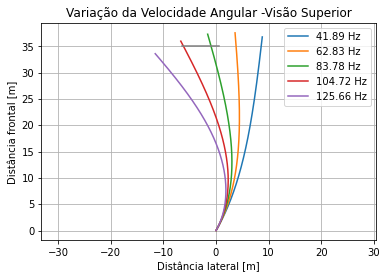

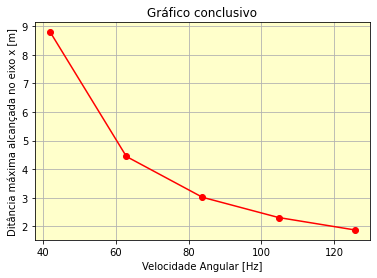

In [20]:
w_lista = [400*2*pi/60, 600*2*pi/60, 800*2*pi/60, 1000*2*pi/60, 1200*2*pi/60]
w_legenda = [400, 600, 800, 1000, 1200]
x_max_w = []
i = 0
while i < len(w_lista):
    # Condições iniciais
    x0 = 0                              # Posição em x inicial [m]
    y0 = 0                              # Posição em y inicial, distancia do gol[m]
    z0 = 0                              # Posição em z inicial [m]
    V = 37                              # Velocidade do chute [m/s]
    alfa = 60*pi/180                    # Ângulo inicial no plano do chão (no eixo X e eixo Y)
    beta = 30*pi/180                    # Ângulo inicial de lançamento (no eixo Z)
    vx0 = V*cos(beta)*cos(alfa)         # Velocidade em x inicial [m/s]
    vy0 = V*cos(beta)*sin(alfa)         # Velocidade em y inicial [m/s]
    vz0 = V*sin(beta)     
    w0 = w_lista[i] 
    X0 = [x0,y0,z0,vx0,vy0,vz0, w0]
    x_w = odeint(funcao, X0 ,t_lista)
    posicao_x= x_w[:,0]
    posicao_y= x_w[:,1]
    posicao_z= x_w[:,2]
    # Adcionando a distância máxima alcançada pela bola no eixo x
    x_max_w.append(max(posicao_x))
    #Gráfico Visão Superior da Trajetória
    plt.plot(posicao_x,posicao_y, label = "{0:.2f} Hz".format(w_lista[i]))
    i+=1

# Gol
lista_gol_x = np.arange(-6.5,1.5, 1)
lista_gol_y = [35]*8
plt.plot(lista_gol_x, lista_gol_y, 'gray')
plt.grid(True)
plt.legend()
plt.title("Variação da Velocidade Angular -Visão Superior")
plt.xlabel("Distância lateral [m]")
plt.ylabel("Distância frontal [m]")
plt.axis('equal')
plt.show()

#plotando o gráfico conclusivo
ax=plt.axes()
ax.set_facecolor('xkcd:ivory')
plt.title("Gráfico conclusivo")
plt.plot(w_lista, x_max_w, 'r-o')
plt.ylabel("Ditância máxima alcançada no eixo x [m]")
plt.xlabel("Velocidade Angular [Hz]")
plt.grid(True)
plt.show()

**VARIANDO A DENSIDADE DO AR**

[0.38420086315566127, 0.6972649704357486, 0.7758548835516165, 0.8838012116314519, 1.2496450504052283]


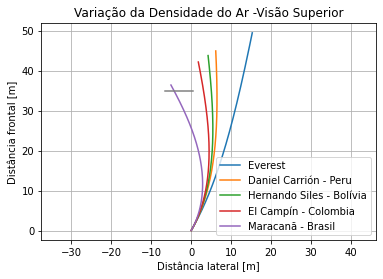

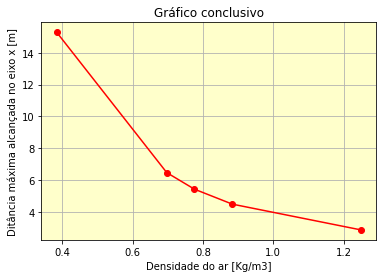

In [19]:
# Variando a densidade do ar
def funcao_p(X,t,p):
    # Desagrupa lista
    x= X[0]
    y= X[1]
    z= X[2]
    Vx= X[3]
    Vy= X[4]
    Vz= X[5]
    w = X[6]
    
    #velocidae
    V = sqrt(Vx**2+Vy**2+Vx**2)
    Vxy = sqrt(Vx**2+Vy**2)
    
    # Seno e Cosseno  alfa
    sen_alfa = Vy/Vxy
    cos_alfa = Vx/Vxy
    
    # Seno e Cosseno  beta
    sen_beta = Vz/V
    cos_beta = Vxy/V
    
    #Calculando Forças Peso, Força de Arasto e Força Magnus
    P = m * g
    Fa = (1/2)*p*Cd*A*(V**2)
    Fm = (1/2)*p*A*Cm*r*w*V
    
    # Calcula as taxas de variação
    dxdt= Vx
    dydt= Vy
    dzdt= Vz
    dVxdt= (1/m)*(-Fm*sen_alfa - Fa*cos_alfa*cos_beta)
    dVydt= (1/m)*(Fm*cos_alfa - Fa*sen_alfa*cos_beta)
    dVzdt= (1/m)*(-P - Fa*sen_beta)
    
    if z <= 0 and Vz < 0:
        dxdt = 0
        dydt = 0
        dzdt = 0
        dVxdt = 0
        dVydt = 0
        dVzdt = 0
        dwdt = 0
    else:
        dxdt= Vx
        dydt= Vy
        dzdt= Vz
        dVxdt= (1/m)*(-Fm*sen_alfa - Fa*cos_alfa*cos_beta)
        dVydt= (1/m)*(Fm*cos_alfa - Fa*sen_alfa*cos_beta)
        dVzdt= (1/m)*(-P - Fa*sen_beta)
        dwdt = -1.5*w
        
    dXdt= [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt, dwdt]
    return dXdt

lista_locais = ['Everest', 'Daniel Carrión - Peru', 'Hernando Siles - Bolívia','El Campín - Colombia', 'Maracanã - Brasil']
lista_altitude = [8848, 4378, 3577, 2600, 2.13]
p_lista = []
for s in lista_altitude:
    p_lista.append(1.25*e**(-s/7500))
    
print(p_lista)
x_max_p = []

j =0
while j < len(p_lista):
    # Condições iniciais
    x0 = 0                              # Posição em x inicial [m]
    y0 = 0                              # Posição em y inicial, distancia do gol[m]
    z0 = 0                              # Posição em z inicial [m]
    V = 37                              # Velocidade do chute [m/s]
    alfa = 60*pi/180                    # Ângulo inicial no plano do chão (no eixo X e eixo Y)
    beta = 30*pi/180                    # Ângulo inicial de lançamento (no eixo Z)
    vx0 = V*cos(beta)*cos(alfa)         # Velocidade em x inicial [m/s]
    vy0 = V*cos(beta)*sin(alfa)         # Velocidade em y inicial [m/s]
    vz0 = V*sin(beta)                   # Velocidade em z inicial [m/s]
    w0 = 800*2*pi/60                    # Velocidade angular da bola 
    X0 = [x0,y0,z0,vx0,vy0,vz0, w0]     # Lista condições iniciais 

    x_p = odeint(funcao_p,X0,t_lista,args= (p_lista[j],))
    posicao_x= x_p[:,0]
    posicao_y= x_p[:,1]
    posicao_z= x_p[:,2]
    
    # Adcionando a distância máxima alcançada pela bola no eixo x
    x_max_p.append(max(posicao_x))
    
    #Gráfico Visão Superior da Trajetória
    plt.plot(posicao_x,posicao_y, label='{0}'.format(lista_locais[j]))
    j+=1

plt.plot(lista_gol_x, lista_gol_y, 'gray')
plt.grid(True)
plt.legend(loc ='lower right')
plt.title("Variação da Densidade do Ar -Visão Superior")
plt.xlabel("Distância lateral [m]")
plt.ylabel("Distância frontal [m]")
plt.axis('equal')
plt.show()

#plotando o gráfico conclusivo
ax=plt.axes()
ax.set_facecolor('xkcd:ivory')
plt.title("Gráfico conclusivo")
plt.plot(p_lista, x_max_p, 'r-o')
plt.ylabel("Ditância máxima alcançada no eixo x [m]")
plt.xlabel("Densidade do ar [Kg/m3]")
plt.grid(True)
plt.show()